In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/Users/saikarthik/Desktop/xai /nasdq.csv')

# Extract relevant columns (Open, High, Low, Close)
df = df[['Open', 'High', 'Low', 'Close']]  # Make sure this matches your dataset columns

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare the data for LSTM (60 days as input, 1 day prediction)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 3])  # Close price (index 3)
    return np.array(X), np.array(y)

# Create training and testing datasets
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split data into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer (1 value: next day's closing price)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the model
model.save('stock_price_prediction_model.h5')

# Predict for the next day, week, month, and year




Epoch 1/10


2024-11-09 11:41:04.002377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-09 11:41:04.129457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 5/97 [>.............................] - ETA: 1s - loss: 0.0470  

2024-11-09 11:41:04.243426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 2s 16ms/step - loss: 0.0034
Epoch 2/10
97/97 [==============================] - 1s 14ms/step - loss: 8.5430e-05
Epoch 3/10
97/97 [==============================] - 1s 14ms/step - loss: 8.4101e-05
Epoch 4/10
97/97 [==============================] - 1s 14ms/step - loss: 8.4999e-05
Epoch 5/10
97/97 [==============================] - 1s 14ms/step - loss: 8.4885e-05
Epoch 6/10
97/97 [==============================] - 2s 16ms/step - loss: 8.0786e-05
Epoch 7/10
97/97 [==============================] - 1s 15ms/step - loss: 7.7700e-05
Epoch 8/10
97/97 [==============================] - 1s 14ms/step - loss: 7.6912e-05
Epoch 9/10
97/97 [==============================] - 1s 14ms/step - loss: 7.7406e-05
Epoch 10/10
97/97 [==============================] - 1s 14ms/step - loss: 7.7466e-05


/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 1.1770202862314587
Mean Squared Error (MSE): 2.36737341724007
Root Mean Squared Error (RMSE): 1.5386271209230877
R-squared (R²): 0.9454091291055154


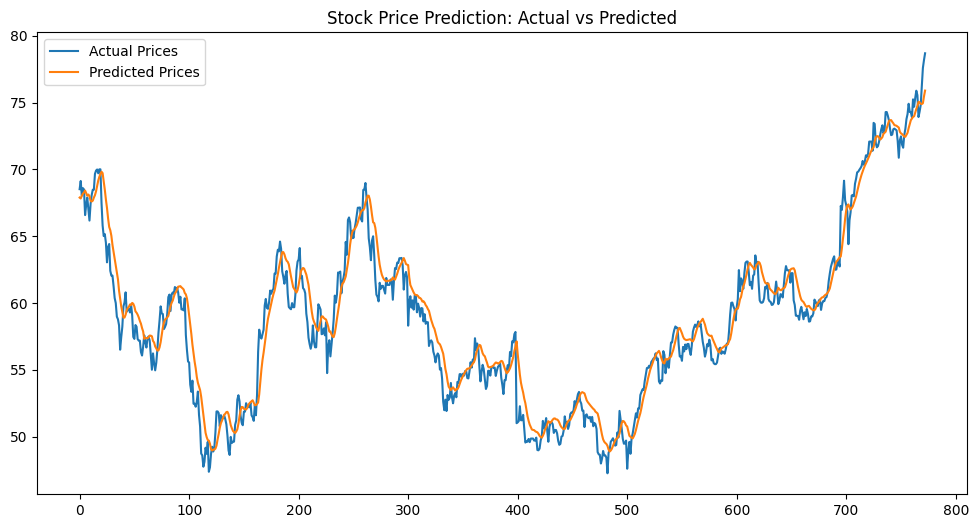

In [82]:
y_pred = model.predict(X_test)

# Inverse scaling to get the actual values
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred.reshape(-1, 1)), axis=1))[:, -1]

# Calculate performance metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.show()